In [22]:
from scipy.misc import imread
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
     

%matplotlib inline

In [6]:
base_dir = "data/training-set/GTSRB/Final_Training/Images/"
            
def partial_data():
    for cls_string in os.listdir(base_dir):
        csv_path = base_dir + "/{0}/GT-{0}.csv".format(cls_string)
        
        df = pd.read_csv(csv_path, sep=";")
        df['Filename'] = base_dir + cls_string + "/" + df['Filename']
        
        yield df


def data_batch_iterator(batch_size):
    
    data = partial_data()
    data = pd.concat(data)
    
    while True:
        batch = data.sample(n=batch_size)
        batch["Image"] = batch.Filename.apply(imread)
        
        yield batch
        


In [15]:
next(data_batch_iterator(5))

,Filename,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Image
491,data/training-set/GTSRB/Final_Training/Images/...,34,36,5,6,29,31,2,"[[[60, 58, 41], [57, 56, 39], [57, 57, 40], [5..."
268,data/training-set/GTSRB/Final_Training/Images/...,88,82,7,7,81,75,31,"[[[80, 72, 70], [78, 72, 69], [77, 72, 70], [7..."
611,data/training-set/GTSRB/Final_Training/Images/...,30,31,6,6,25,26,9,"[[[42, 37, 23], [97, 82, 73], [119, 93, 82], [..."
1630,data/training-set/GTSRB/Final_Training/Images/...,44,44,6,5,39,39,4,"[[[63, 62, 62], [56, 61, 61], [49, 61, 65], [7..."
791,data/training-set/GTSRB/Final_Training/Images/...,34,34,6,6,29,29,10,"[[[116, 122, 144], [102, 112, 128], [98, 112, ..."


class: 41, shape: (63, 60, 3)


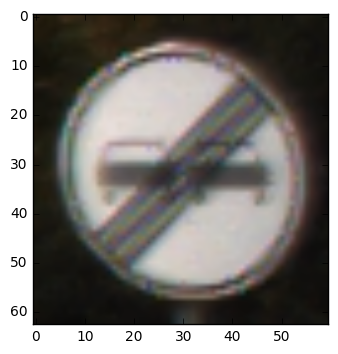

class: 30, shape: (34, 34, 3)


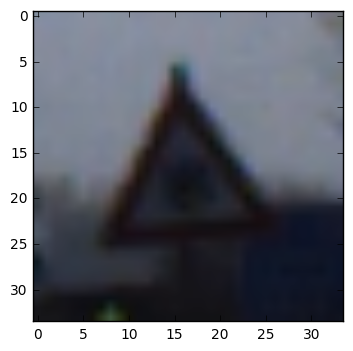

class: 18, shape: (45, 49, 3)


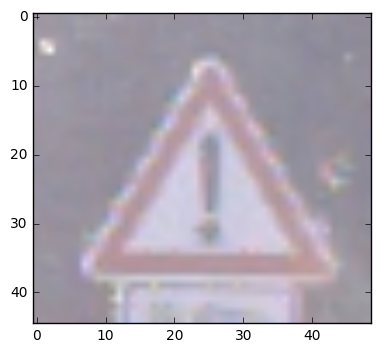

class: 5, shape: (48, 48, 3)


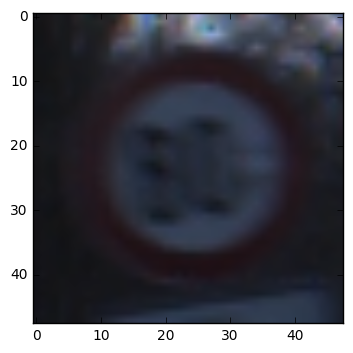

class: 34, shape: (36, 36, 3)


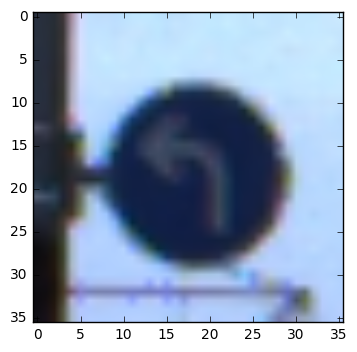

class: 1, shape: (38, 39, 3)


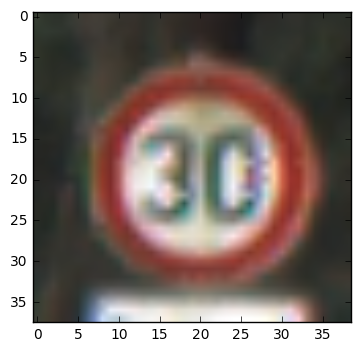

class: 4, shape: (39, 40, 3)


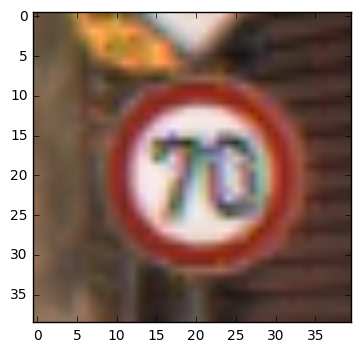

class: 4, shape: (45, 45, 3)


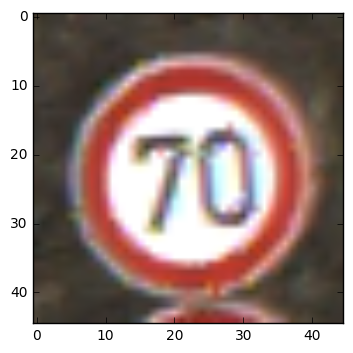

class: 9, shape: (34, 33, 3)


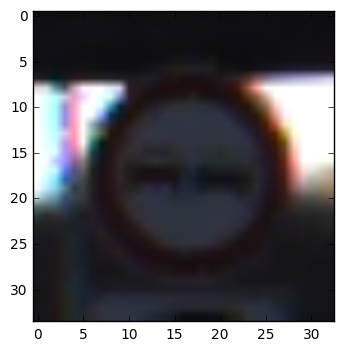

class: 4, shape: (64, 61, 3)


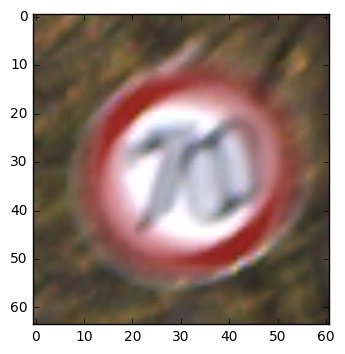

In [13]:
batch_size = 10
batch = next(data_batch_iterator(batch_size))

for i, row in batch.iterrows():
    img = row.Image
    print("class: {}, shape: {}".format(row.ClassId, img.shape))
    plt.imshow(img)
    plt.show()

In [69]:
import tensorflow as tf
sess = tf.InteractiveSession()


x = tf.placeholder(tf.int8, [None, None, 3])

In [80]:
r = tf.image.resize_images(x, [63, 63])
r =  tf.cast(255 - r, tf.int8)

(63, 60, 3)


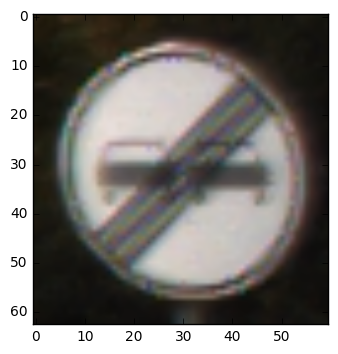

(63, 63, 3)


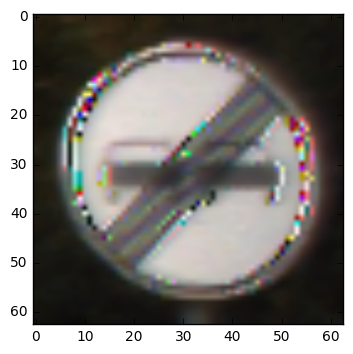

In [81]:
oimg = batch.Image.iloc[0]
img = sess.run(r, {x: oimg})

print(oimg.shape)
plt.imshow(oimg)
plt.show()

print(img.shape)
plt.imshow(img)
plt.show()

In [54]:
tf.constant(255, dtype=tf.int8)

<tf.Tensor 'Const_1:0' shape=() dtype=int8>